<a href="https://colab.research.google.com/github/Saksham-tyagi1/NBA-Analysis/blob/main/Clustering_Stage_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold,train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from joblib import Parallel, delayed
import numpy as np



pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/Encoded_data.parquet')

In [17]:
df.head()

,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,HOME_TEAM,AWAY_TEAM,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,SPD,DIST,ORBC,DRBC,TCHS,SAST,AST,FGM,FGA,DFGM,DFGA,DFG_PCT,SHOT_CLOCK_RANGE,SCORE,SCOREMARGIN,EFG_PCT,PERSON1TYPE,PERSON2TYPE,PERSON3TYPE,LOC_X_BIN,LOC_Y_BIN,SHOT_DISTANCE_BIN,ACTION_TYPE_modified,game_time,time_left_in_quarter,time_left_in_game,last_shot_of_quarter,shot_clock_status,is_clutch,rolling_efg_pct,rolling_score_margin,last_30_seconds,shots_in_last_30_seconds,quarter_progress,zone_combination,zone_combination_attempts,zone_combination_made,zone_combination_success_rate,BASIC_ZONE_freq,zone_dfg%,DFG%,zone_fg%,clutch_efg_pct,clutch_dfg_pct,is_hot_zone,rolling_dfg%,rolling_efg%,SHOT_TYPE_2PT Field Goal,SHOT_TYPE_3PT Field Goal,BASIC_ZONE_Above the Break 3,BASIC_ZONE_Backcourt,BASIC_ZONE_In The Paint (Non-RA),BASIC_ZONE_Left Corner 3,BASIC_ZONE_Mid-Range,BASIC_ZONE_Restricted Area,BASIC_ZONE_Right Corner 3,ZONE_NAME_Back Court,ZONE_NAME_Center,ZONE_NAME_Left Side,ZONE_NAME_Left Side Center,ZONE_NAME_Right Side,ZONE_NAME_Right Side Center,ZONE_RANGE_16-24 ft.,ZONE_RANGE_24+ ft.,ZONE_RANGE_8-16 ft.,ZONE_RANGE_Back Court Shot,ZONE_RANGE_Less Than 8 ft.,POSITION_GROUP_C,POSITION_GROUP_F,POSITION_GROUP_G,ACTION_TYPE_freq,shot_clock_status_Average,shot_clock_status_Early,shot_clock_status_Late,shot_clock_status_Very Early,shot_clock_status_Very Late,quarter_progress_Early,quarter_progress_Middle,quarter_progress_Late,POSITION_modified,POSITION_freq,LOC_X_orig,LOC_Y_orig,SHOT_DISTANCE_orig,SPD_orig,DIST_orig,ORBC_orig,DRBC_orig,TCHS_orig,SAST_orig,AST_orig,FGM_orig,FGA_orig,DFGM_orig,DFGA_orig,DFG_PCT_orig,SCOREMARGIN_orig,EFG_PCT_orig,PERSON1TYPE_orig,PERSON2TYPE_orig,PERSON3TYPE_orig,game_time_orig,time_left_in_quarter_orig,time_left_in_game_orig,rolling_efg_pct_orig,rolling_score_margin_orig,last_30_seconds_orig,shots_in_last_30_seconds_orig,zone_combination_attempts_orig,zone_combination_made_orig,zone_combination_success_rate_orig,BASIC_ZONE_freq_orig,zone_dfg%_orig,DFG%_orig,zone_fg%_orig,clutch_efg_pct_orig,clutch_dfg_pct_orig,rolling_dfg%_orig,rolling_efg%_orig,ACTION_TYPE_freq_orig,POSITION_freq_orig,shot_cluster
0,1610612747,Los Angeles Lakers,2544,LeBron James,F,PF,03-16-2024,22300973,LAL,GSW,True,Turnaround Fadeaway shot,2PT Field Goal,Mid-Range,Left Side,8-16 ft.,1.164516,-0.767899,-0.066461,1,8,32,-1.968729,0.424169,0.726167,-0.166752,1.657492,1.171734,1.489494,2.043248,1.973102,0.216947,0.586591,-0.325219,22-18 Very Early,0 - 3,0.199785,0.363455,-0.994115,0.499304,0.0,"(12.5, 15.0]","(5.81, 11.37]",midrange,Turnaround Fadeaway shot,-1.465149,0.776378,1.470902,0,Very Early,False,0.366165,0.203868,-0.235713,-0.887751,Late,Mid-Range_Left Side,-0.606305,-0.597711,-0.426884,-1.343735,-0.3924,-0.3252,0.979285,0.312657,-0.229292,True,-0.325326,0.369598,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,-0.886222,False,False,False,True,False,False,False,True,PF,-0.400507,13.7,7.45,13.0,3.7,2.48,1.721645,6.0,94.0,0.375887,2.890069,6.930638,8.224499,1.207078,1.892608,0.5,3.0,0.596,4.0,4.0,0.0,3.466667,512,2672,0.596,3.000000,0,0,6888,2646,0.384146,0.112099,0.614779,0.5,0.538118,0.566,0.596584,0.5,0.596,340513,3622633,3
1,1610612747,Los Angeles Lakers,2544,LeBron James,F,PF,03-16-2024,22300973,LAL,GSW,True,Turnaround Fadeaway shot,2PT Field Goal,Mid-Range,Left Side,8-16 ft.,1.164516,-0.767899,-0.066461,1,8,32,-1.968729,0.424169,0.726167,-0.166752,1.657492,1.171734,1.489494,2.043248,1.973102,0.216947,0.586591,-0.325219,22-18 Very Early,2 - 3,0.037688,0.363455,1.005920,0.957096,0.0,"(12.5, 15.0]","(5.81, 11.37]",midrange,Turnaround Fadeaway shot,-1.465149,0.776378,1.470902,0,Very Early,False,0.366165,0.121164,-0.235713,-0.887751,Late,Mid-Range_Left Side,-0.606305,-0.597711,-0.426884,-1.343735,-0.3924,-0.3252,0.979285,0.312657,-

In [18]:
numeric_df = df.select_dtypes(include=[np.number])

# Calculate variance and standard deviation for numeric features
all_variance = numeric_df.var()
all_std_dev = numeric_df.std()

print("Variance of all numeric features:\n", all_variance)
print("\nStandard Deviation of all numeric features:\n", all_std_dev)


Variance of all numeric features:
 TEAM_ID                               7.530884e+01
PLAYER_ID                             3.630438e+11
GAME_ID                               4.376687e+03
LOC_X                                 1.000000e+00
LOC_Y                                 1.000000e+00
SHOT_DISTANCE                         1.000000e+00
QUARTER                               1.290725e+00
MINS_LEFT                             1.193106e+01
SECS_LEFT                             3.017205e+02
SPD                                   1.000000e+00
DIST                                  1.000000e+00
ORBC                                  1.000000e+00
DRBC                                  1.000000e+00
TCHS                                  1.000000e+00
SAST                                  1.000000e+00
AST                                   1.000000e+00
FGM                                   1.000000e+00
FGA                                   1.000000e+00
DFGM                                  1.000000e

In [ ]:
df.shape

(20134694, 143)

In [ ]:
df.isna().sum()

,0
TEAM_ID,0
TEAM_NAME,0
PLAYER_ID,0
PLAYER_NAME,0
POSITION_GROUP,0
POSITION,0
GAME_DATE,0
GAME_ID,0
HOME_TEAM,0
AWAY_TEAM,0


# Feature Selection

In [ ]:
stage_1_features = [
    'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'SHOT_MADE', 'ACTION_TYPE_freq',
    'shot_clock_status_Early', 'shot_clock_status_Late',
    'shot_clock_status_Very Early', 'shot_clock_status_Very Late',
    'SCOREMARGIN', 'time_left_in_game', 'time_left_in_quarter', 'QUARTER',
    'SHOT_TYPE_2PT Field Goal', 'SHOT_TYPE_3PT Field Goal',
    'BASIC_ZONE_Backcourt', 'BASIC_ZONE_In The Paint (Non-RA)',
    'BASIC_ZONE_Left Corner 3', 'BASIC_ZONE_Mid-Range',
    'BASIC_ZONE_Restricted Area', 'BASIC_ZONE_Right Corner 3',
    'ZONE_RANGE_8-16 ft.', 'ZONE_RANGE_24+ ft.', 'ZONE_RANGE_Less Than 8 ft.',
    'EFG_PCT', 'ORBC', 'DRBC', 'SPD', 'DIST', 'quarter_progress_Middle',
    'quarter_progress_Late'
]
df_stage_1 = df[stage_1_features]

In [ ]:
df_stage_1.dtypes

,0
LOC_X,float64
LOC_Y,float64
SHOT_DISTANCE,float64
SHOT_MADE,bool
ACTION_TYPE_freq,float64
shot_clock_status_Early,bool
shot_clock_status_Late,bool
shot_clock_status_Very Early,bool
shot_clock_status_Very Late,bool
SCOREMARGIN,float64


In [35]:
_, sampled_df = train_test_split(df_stage_1, test_size=0.02, stratify=df_stage_1['SHOT_TYPE_2PT Field Goal'])


In [36]:
df.dtypes

,0
TEAM_ID,int32
TEAM_NAME,object
PLAYER_ID,int32
PLAYER_NAME,object
POSITION_GROUP,object
POSITION,object
GAME_DATE,object
GAME_ID,int32
HOME_TEAM,object
AWAY_TEAM,object


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

X_sample = sampled_df.drop(['SHOT_MADE'], axis=1)
y_sample = sampled_df['SHOT_MADE']

model = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1 )
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_sample, y_sample)

rfe_ranking = rfe.ranking_
selected_features_rfe = X_sample.columns[rfe.support_]

print("Selected Features:", selected_features_rfe)
print("RFE Ranking:", rfe_ranking)


Selected Features: Index(['LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'ACTION_TYPE_freq',
       'time_left_in_game', 'time_left_in_quarter', 'ORBC', 'DRBC', 'SPD',
       'DIST'],
      dtype='object')
RFE Ranking: [ 1  1  1  1  8  9 10 15  3  1  1  2 11 17 21 14 19 16  5 20 18 13  6  4
  1  1  1  1  7 12]


In [ ]:

core_features = [feature for feature in stage_1_features if feature != 'SHOT_MADE']  # Exclude target variable
X_core = sampled_df[core_features]
y_core = sampled_df['SHOT_MADE']

alphas = [0.001, 0.005, 0.01]

def apply_lasso(alpha):
    lasso = Lasso(alpha=alpha, random_state=42)
    lasso.fit(X_core, y_core)
    feature_coefficients = lasso.coef_
    selected_features_lasso = [feature for feature, coef in zip(core_features, feature_coefficients) if coef != 0]
    return alpha, selected_features_lasso, feature_coefficients

results = Parallel(n_jobs=-1)(delayed(apply_lasso)(alpha) for alpha in alphas)

# Collect and display results
lasso_results = {}
for alpha, selected_features, coefficients in results:
    lasso_results[alpha] = dict(zip(core_features, coefficients))
    print(f"\nAlpha: {alpha}")
    print("Selected Features after LASSO:", selected_features)
    print("Coefficients:", coefficients)
final_streamlined_features = set.intersection(*[set(features) for _, features, _ in results])
print("\nFinal Streamlined Feature Set:", final_streamlined_features)



Alpha: 0.001
Selected Features after LASSO: ['LOC_X', 'SHOT_DISTANCE', 'ACTION_TYPE_freq', 'shot_clock_status_Very Late', 'time_left_in_quarter', 'QUARTER', 'BASIC_ZONE_In The Paint (Non-RA)', 'BASIC_ZONE_Mid-Range', 'BASIC_ZONE_Restricted Area', 'BASIC_ZONE_Right Corner 3', 'ZONE_RANGE_24+ ft.', 'ZONE_RANGE_Less Than 8 ft.', 'EFG_PCT', 'ORBC', 'DRBC', 'SPD', 'DIST']
Coefficients: [-0.00148275 -0.         -0.0916436  -0.00040808 -0.          0.
  0.         -0.05104857  0.          0.          0.00445655 -0.00547763
 -0.          0.          0.         -0.03292024 -0.         -0.00779323
  0.15018427  0.00921581  0.          0.01161307 -0.03678118  0.01358717
 -0.02692693  0.01656907 -0.00579946  0.0083542  -0.          0.        ]

Alpha: 0.005
Selected Features after LASSO: ['LOC_Y', 'SHOT_DISTANCE', 'time_left_in_quarter', 'QUARTER', 'BASIC_ZONE_In The Paint (Non-RA)', 'BASIC_ZONE_Restricted Area', 'EFG_PCT', 'ORBC', 'DRBC', 'SPD', 'DIST']
Coefficients: [-0.         -0.00259554 -0.

In [ ]:
df.columns

Index(['TEAM_ID', 'TEAM_NAME', 'PLAYER_ID', 'PLAYER_NAME', 'POSITION_GROUP',
       'POSITION', 'GAME_DATE', 'GAME_ID', 'HOME_TEAM', 'AWAY_TEAM',
       ...
       'SCOREMARGIN_orig', 'rolling_score_margin_orig', 'rolling_efg%_orig',
       'rolling_dfg%_orig', 'ACTION_TYPE_freq_orig',
       'shots_in_last_30_seconds_orig', 'zone_combination_attempts_orig',
       'zone_combination_made_orig', 'SHOT_DISTANCE_orig', 'DIST_orig'],
      dtype='object', length=119)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Use the core features identified in RFE and LASSO
core_features = list(set(selected_features_rfe) | set(final_streamlined_features))  # Combine RFE and LASSO results
X_core = sampled_df[core_features]
y_core = sampled_df['SHOT_MADE']

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced")
rf_model.fit(X_core, y_core)

# Get feature importances
rf_importances = rf_model.feature_importances_
rf_feature_ranking = pd.DataFrame({
    'feature': core_features,
    'rf_importance': rf_importances
}).sort_values(by='rf_importance', ascending=False)

print("Random Forest Feature Importance Ranking:\n", rf_feature_ranking)


Random Forest Feature Importance Ranking:
                        feature  rf_importance
0            time_left_in_game       0.125593
5         time_left_in_quarter       0.123157
4                        LOC_Y       0.117389
6                        LOC_X       0.115053
11                        DIST       0.113657
8                          SPD       0.106470
3                SHOT_DISTANCE       0.070833
1                         DRBC       0.067493
2             ACTION_TYPE_freq       0.061386
7                         ORBC       0.053549
9   BASIC_ZONE_Restricted Area       0.024271
10                     EFG_PCT       0.021150


In [ ]:
import pandas as pd

# Updated rankings from each method
# RFE selected features with ranks
rfe_rankings = {
    'LOC_X': 1, 'LOC_Y': 1, 'SHOT_DISTANCE': 1, 'ACTION_TYPE_freq': 1,
    'time_left_in_game': 8, 'time_left_in_quarter': 9, 'ORBC': 10,
    'DRBC': 15, 'SPD': 3, 'DIST': 1
}

# LASSO selected features with ranks (based on streamlined feature sets for different alpha values)
lasso_rankings = {
    'LOC_X': 1, 'LOC_Y': 2, 'SHOT_DISTANCE': 1, 'ACTION_TYPE_freq': 3,
    'time_left_in_quarter': 2, 'QUARTER': 5, 'BASIC_ZONE_In The Paint (Non-RA)': 6,
    'BASIC_ZONE_Restricted Area': 1, 'EFG_PCT': 3, 'ORBC': 2, 'DRBC': 2, 'SPD': 3, 'DIST': 1
}

# Random Forest rankings from the importance results
rf_rankings = {
    'time_left_in_game': 1, 'time_left_in_quarter': 2, 'LOC_Y': 3,
    'LOC_X': 4, 'DIST': 5, 'SPD': 6, 'SHOT_DISTANCE': 7,
    'DRBC': 8, 'ACTION_TYPE_freq': 9, 'ORBC': 10,
    'BASIC_ZONE_Restricted Area': 11, 'EFG_PCT': 12
}

# Combine all features from the three methods
core_features = list(set(rfe_rankings.keys()).union(set(lasso_rankings.keys()), set(rf_rankings.keys())))

# Create a DataFrame to hold the ranks from each method
ranking_df = pd.DataFrame({
    'feature': core_features,
    'rfe_rank': [rfe_rankings.get(f, len(core_features)) for f in core_features],
    'lasso_rank': [lasso_rankings.get(f, len(core_features)) for f in core_features],
    'rf_rank': [rf_rankings.get(f, len(core_features)) for f in core_features]
})

# Calculate the average rank for each feature
ranking_df['average_rank'] = ranking_df[['rfe_rank', 'lasso_rank', 'rf_rank']].mean(axis=1)

# Sort features by average rank
final_ranked_features = ranking_df.sort_values(by='average_rank')

print("\nAggregated Rankings:\n", final_ranked_features[['feature', 'average_rank']])



Aggregated Rankings:
                              feature  average_rank
2                              LOC_Y      2.000000
9                              LOC_X      2.000000
12                              DIST      2.333333
1                      SHOT_DISTANCE      3.000000
8                                SPD      4.000000
0                   ACTION_TYPE_freq      4.333333
3               time_left_in_quarter      4.333333
7                               ORBC      7.333333
5                  time_left_in_game      7.666667
6                               DRBC      8.333333
4         BASIC_ZONE_Restricted Area      8.666667
11                           EFG_PCT      9.666667
10                           QUARTER     11.000000
13  BASIC_ZONE_In The Paint (Non-RA)     11.333333


In [ ]:
import pandas as pd

# Updated LASSO rankings and selected features
lasso_rankings = {
    'LOC_X': 1, 'LOC_Y': 2, 'SHOT_DISTANCE': 3, 'ACTION_TYPE_freq': 4,
    'time_left_in_game': 5, 'time_left_in_quarter': 6, 'BASIC_ZONE_In The Paint (Non-RA)': 7,
    'BASIC_ZONE_Restricted Area': 8, 'ORBC': 9, 'DRBC': 10
}

# Updated RFE rankings
rfe_rankings = {
    'LOC_X': 1, 'LOC_Y': 1, 'SHOT_DISTANCE': 1, 'ACTION_TYPE_freq': 1,
    'time_left_in_game': 8, 'time_left_in_quarter': 9, 'ORBC': 15,
    'DRBC': 17, 'SPD': 2, 'DIST': 3
}

# Updated Random Forest rankings
rf_rankings = {
    'time_left_in_game': 1, 'time_left_in_quarter': 2, 'LOC_Y': 3, 'DIST': 4,
    'LOC_X': 5, 'SPD': 6, 'SHOT_DISTANCE': 7, 'DRBC': 8, 'ACTION_TYPE_freq': 9, 'ORBC': 10,
    'BASIC_ZONE_Restricted Area': 11, 'BASIC_ZONE_In The Paint (Non-RA)': 12
}

# Final streamlined feature set
final_feature_set = {
    'LOC_Y', 'SHOT_DISTANCE', 'ACTION_TYPE_freq', 'LOC_X',
    'BASIC_ZONE_In The Paint (Non-RA)', 'BASIC_ZONE_Restricted Area',
    'DRBC', 'ORBC', 'time_left_in_game', 'time_left_in_quarter'
}

# Aggregate rankings into a DataFrame
ranking_df = pd.DataFrame({
    'feature': list(final_feature_set),
    'lasso_rank': [lasso_rankings.get(f, len(final_feature_set) + 1) for f in final_feature_set],
    'rfe_rank': [rfe_rankings.get(f, len(final_feature_set) + 1) for f in final_feature_set],
    'rf_rank': [rf_rankings.get(f, len(final_feature_set) + 1) for f in final_feature_set]
})

# Calculate the average rank for each feature
ranking_df['average_rank'] = ranking_df[['lasso_rank', 'rfe_rank', 'rf_rank']].mean(axis=1)

# Sort by average rank
final_ranked_features = ranking_df.sort_values(by='average_rank')

# Display the aggregated rankings
print("\nAggregated Rankings:\n", final_ranked_features[['feature', 'average_rank']])

# If needed, extract features sorted by rank
sorted_features = final_ranked_features['feature'].tolist()
print("\nFeatures sorted by average rank:\n", sorted_features)



Aggregated Rankings:
                             feature  average_rank
0                             LOC_Y      2.000000
7                             LOC_X      2.333333
1                     SHOT_DISTANCE      3.666667
2                  ACTION_TYPE_freq      4.666667
8                 time_left_in_game      4.666667
9              time_left_in_quarter      5.666667
3  BASIC_ZONE_In The Paint (Non-RA)     10.000000
5        BASIC_ZONE_Restricted Area     10.000000
4                              ORBC     11.333333
6                              DRBC     11.666667

Features sorted by average rank:
 ['LOC_Y', 'LOC_X', 'SHOT_DISTANCE', 'ACTION_TYPE_freq', 'time_left_in_game', 'time_left_in_quarter', 'BASIC_ZONE_In The Paint (Non-RA)', 'BASIC_ZONE_Restricted Area', 'ORBC', 'DRBC']


In [ ]:
import pandas as pd

# LASSO selected features with ranks (LASSO importance is approximated here, as you've got several alpha thresholds)
lasso_rankings = {'LOC_X': 1, 'LOC_Y': 2, 'SHOT_DISTANCE': 3, 'ACTION_TYPE_freq': 4,
                  'SCOREMARGIN': 5, 'time_left_in_game': 6, 'time_left_in_quarter': 7,
                  'BASIC_ZONE_In The Paint (Non-RA)': 8, 'BASIC_ZONE_Restricted Area': 9,
                  'ORBC': 10, 'DRBC': 11}

# RFE selected features with ranks
rfe_rankings = {'LOC_X': 1, 'LOC_Y': 2, 'SHOT_DISTANCE': 3, 'ACTION_TYPE_freq': 4,
                'time_left_in_game': 5, 'time_left_in_quarter': 6, 'ORBC': 7,
                'DRBC': 8, 'SPD': 9, 'DIST': 10}

# Random Forest rankings from the importance results
rf_rankings = {
    'time_left_in_game': 1, 'time_left_in_quarter': 2, 'LOC_Y': 3, 'DIST': 4,
    'LOC_X': 5, 'SPD': 6, 'SHOT_DISTANCE': 7, 'DRBC': 8, 'ACTION_TYPE_freq': 9, 'ORBC': 10
}

# Core features to combine rankings
core_features = list(set(lasso_rankings.keys()).union(set(rfe_rankings.keys()), set(rf_rankings.keys())))

# Create a DataFrame to hold the ranks from each method
ranking_df = pd.DataFrame({
    'feature': core_features,
    'lasso_rank': [lasso_rankings.get(f, len(core_features)) for f in core_features],
    'rfe_rank': [rfe_rankings.get(f, len(core_features)) for f in core_features],
    'rf_rank': [rf_rankings.get(f, len(core_features)) for f in core_features]
})

# Calculate the average rank for each feature
ranking_df['average_rank'] = ranking_df[['lasso_rank', 'rfe_rank', 'rf_rank']].mean(axis=1)
final_ranked_features = ranking_df.sort_values(by='average_rank')

print("\nAggregated Rankings:\n", final_ranked_features[['feature', 'average_rank']])



Aggregated Rankings:
                              feature  average_rank
6                              LOC_Y      2.333333
9                              LOC_X      2.333333
1                  time_left_in_game      4.000000
5                      SHOT_DISTANCE      4.333333
7               time_left_in_quarter      5.000000
4                   ACTION_TYPE_freq      5.666667
0                               DIST      9.000000
3                               DRBC      9.000000
11                              ORBC      9.000000
8                                SPD      9.333333
12                       SCOREMARGIN     10.333333
2   BASIC_ZONE_In The Paint (Non-RA)     11.333333
10        BASIC_ZONE_Restricted Area     11.666667


In [ ]:
selected_features_final = final_ranked_features.head(10)['feature'].tolist()
print("\nFinal Selected Features for Clustering:\n", selected_features_final)



Final Selected Features for Clustering:
 ['LOC_Y', 'LOC_X', 'time_left_in_game', 'SHOT_DISTANCE', 'time_left_in_quarter', 'ACTION_TYPE_freq', 'DIST', 'DRBC', 'ORBC', 'SPD']


# Clustering

In [9]:
from sklearn.cluster import MiniBatchKMeans
selected_features = ['LOC_Y', 'LOC_X', 'time_left_in_game', 'SHOT_DISTANCE', 'time_left_in_quarter', 'ACTION_TYPE_freq', 'DIST', 'DRBC', 'ORBC', 'SPD']
minibatch_kmeans = MiniBatchKMeans(n_clusters=4, random_state=42, batch_size=50000)

# Run the clustering algorithm on the selected features
df['shot_cluster'] = minibatch_kmeans.fit_predict(df[selected_features])


In [10]:
from sklearn.decomposition import PCA

# Initialize PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[selected_features])


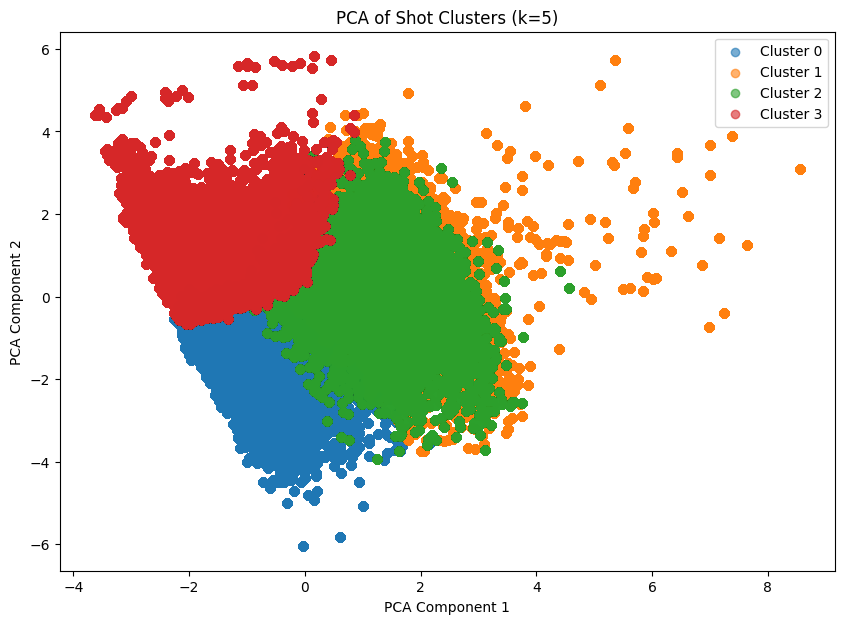

In [11]:
import matplotlib.pyplot as plt

# Create a scatter plot for the PCA-reduced components
plt.figure(figsize=(10, 7))
for cluster in range(4):
    cluster_points = pca_components[df['shot_cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Shot Clusters (k=5)')
plt.legend()
plt.show()


In [13]:
print(pca_components[:10])
print(pca_components.shape)


[[-1.2043199   0.93446339]
 [-1.2043199   0.93446339]
 [-1.2043199   0.93446339]
 [-1.2043199   0.93446339]
 [-1.2043199   0.93446339]
 [-1.2043199   0.93446339]
 [-1.2043199   0.93446339]
 [-1.2043199   0.93446339]
 [-1.2043199   0.93446339]
 [-1.2043199   0.93446339]]
(20134694, 2)


In [14]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Variance Explained:", pca.explained_variance_ratio_.cumsum())


Explained Variance Ratio: [0.24323985 0.17100085]
Cumulative Variance Explained: [0.24323985 0.4142407 ]


In [15]:
from sklearn.decomposition import PCA

# Retain components that explain up to 80% of the variance
pca = PCA(n_components=0.8)  # Set explained variance threshold
pca_components = pca.fit_transform(df[selected_features_final])

# Check explained variance
print("Explained Variance by Each Component:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.cumsum())



Explained Variance by Each Component: [0.24323985 0.17100085 0.12512327 0.0999783  0.0949616  0.07587886]
Cumulative Explained Variance: [0.24323985 0.4142407  0.53936397 0.63934227 0.73430387 0.81018273]


In [19]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Sample the data for faster computation
sample_fraction = 0.01  # 1% of the dataset
X_sample = df[selected_features].sample(frac=sample_fraction, random_state=42)
y_sample = df['shot_cluster'][X_sample.index]

# Silhouette Score
silhouette_avg = silhouette_score(X_sample, y_sample)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index
db_index = davies_bouldin_score(X_sample, y_sample)
print(f"Davies-Bouldin Index: {db_index}")


Silhouette Score: 0.1348336118344344
Davies-Bouldin Index: 2.1229010134760147


In [20]:
from sklearn.decomposition import PCA

# Increase PCA components to 4 or 6
pca = PCA(n_components=4)  # Or n_components=6
pca_components = pca.fit_transform(df[selected_features])

print(f"Explained Variance (4 components): {pca.explained_variance_ratio_.sum()}")


Explained Variance (4 components): 0.6393422719126851


In [23]:
from joblib import Parallel, delayed
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

# Sample 1% of the data for clustering and evaluation
sample_fraction = 0.01
sample_indices = np.random.choice(pca_components.shape[0], size=int(pca_components.shape[0] * sample_fraction), replace=False)
pca_sample = pca_components[sample_indices]

# Function to evaluate k on the sample
def evaluate_k(k):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=5000)
    labels = minibatch_kmeans.fit_predict(pca_sample)  # Cluster only on the sample
    silhouette_avg = silhouette_score(pca_sample, labels)
    db_index = davies_bouldin_score(pca_sample, labels)
    return k, silhouette_avg, db_index

# Parallel computation for k=4 to k=6
results = Parallel(n_jobs=-1)(delayed(evaluate_k)(k) for k in range(4, 7))

# Print the results
for k, silhouette, db in results:
    print(f"\nFor k={k}:")
    print(f"Silhouette Score: {silhouette}")
    print(f"Davies-Bouldin Index: {db}")




For k=4:
Silhouette Score: 0.2529936408187213
Davies-Bouldin Index: 1.380295545127581

For k=5:
Silhouette Score: 0.23885746604809024
Davies-Bouldin Index: 1.305373254815967

For k=6:
Silhouette Score: 0.2282705433026343
Davies-Bouldin Index: 1.317677816207017


In [24]:
from sklearn.cluster import MiniBatchKMeans
import pandas as pd

# Fit MiniBatchKMeans with k=4 on the full PCA components
minibatch_kmeans = MiniBatchKMeans(n_clusters=4, random_state=42, batch_size=50000)
df['shot_cluster'] = minibatch_kmeans.fit_predict(pca_components)

# Analyze cluster centroids
centroids = minibatch_kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=[f'PCA_{i+1}' for i in range(pca_components.shape[1])])
print("\nCluster Centroids:\n", centroid_df)



Cluster Centroids:
       PCA_1     PCA_2     PCA_3     PCA_4
0 -0.906724 -1.187007 -0.048519  0.016627
1  1.453881  0.229712  0.114951 -1.283230
2  1.498995  0.344641 -0.051606  1.219616
3 -1.603480  0.924550  0.003754 -0.002789


In [25]:
# Calculate shooting efficiency (mean `SHOT_MADE`) by cluster
cluster_efficiency = df.groupby('shot_cluster')['SHOT_MADE'].mean()
print("\nShooting Efficiency by Cluster:\n", cluster_efficiency)

# Optional: Count number of shots in each cluster
cluster_counts = df['shot_cluster'].value_counts()
print("\nNumber of Shots per Cluster:\n", cluster_counts)



Shooting Efficiency by Cluster:
 shot_cluster
0    0.554945
1    0.374798
2    0.371838
3    0.559461
Name: SHOT_MADE, dtype: float64

Number of Shots per Cluster:
 shot_cluster
0    5922644
3    5120546
2    4645272
1    4446232
Name: count, dtype: int64



Centroids in Original Feature Space:
       LOC_Y     LOC_X  time_left_in_game  SHOT_DISTANCE  time_left_in_quarter  \
0 -0.746045 -0.027845          -0.105421      -0.769074             -0.086720   
1  0.842716 -1.250172           0.040072       0.914976              0.032008   
2  0.803337  1.251011          -0.015319       0.935513             -0.053683   
3 -0.598019 -0.007503           0.107175      -0.758661              0.127424   

   ACTION_TYPE_freq      DIST      DRBC      ORBC       SPD  
0         -0.612912 -0.542468 -0.492340 -0.156970  0.359620  
1          0.766409  0.001615 -0.182999 -0.299098  0.056435  
2          0.771258  0.018032 -0.143306 -0.369371 -0.122785  
3         -0.662258  0.646279  0.902410  0.807763 -0.376704  

Shooting Efficiency by Cluster:
 shot_cluster
0    0.554945
1    0.374798
2    0.371838
3    0.559461
Name: SHOT_MADE, dtype: float64


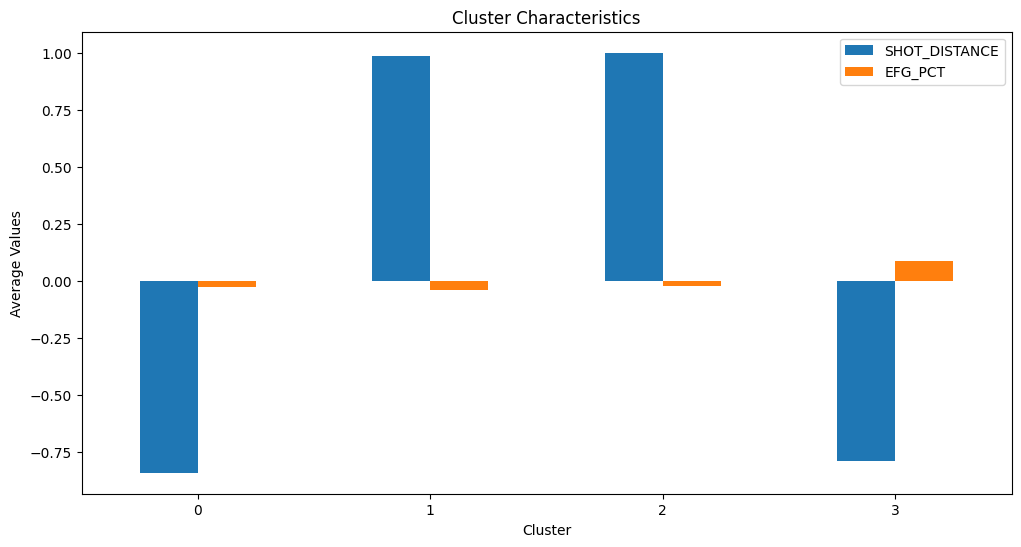

In [27]:
# Map centroids to original features (if PCA transformation is stored)
original_centroids = pca.inverse_transform(centroids)
original_centroids_df = pd.DataFrame(original_centroids, columns=selected_features)
print("\nCentroids in Original Feature Space:\n", original_centroids_df)

# Analyze shooting efficiency by cluster
cluster_efficiency = df.groupby('shot_cluster')['SHOT_MADE'].mean()
print("\nShooting Efficiency by Cluster:\n", cluster_efficiency)

# Visualize average SHOT_DISTANCE and EFG_PCT by cluster
df.groupby('shot_cluster')[['SHOT_DISTANCE', 'EFG_PCT']].mean().plot(kind='bar', figsize=(12, 6))
plt.title('Cluster Characteristics')
plt.xlabel('Cluster')
plt.ylabel('Average Values')
plt.xticks(rotation=0)
plt.show()



Shooting Efficiency by Cluster:
 shot_cluster
0    0.554945
1    0.374798
2    0.371838
3    0.559461
Name: SHOT_MADE, dtype: float64


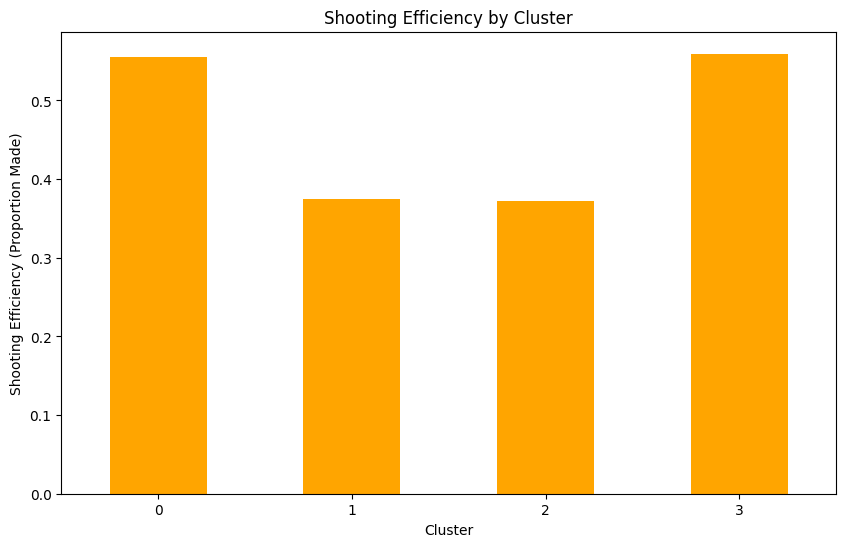

In [28]:
# Calculate shooting efficiency by cluster
cluster_efficiency = df.groupby('shot_cluster')['SHOT_MADE'].mean()
print("\nShooting Efficiency by Cluster:\n", cluster_efficiency)

# Visualize shooting efficiency
cluster_efficiency.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Shooting Efficiency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Shooting Efficiency (Proportion Made)')
plt.xticks(rotation=0)
plt.show()



Average Feature Values by Cluster:
               SHOT_DISTANCE     LOC_X     LOC_Y   EFG_PCT      DIST      ORBC  \
shot_cluster                                                                    
0                 -0.841431 -0.027074 -0.638453 -0.028836 -0.490587 -0.234297   
1                  0.985006 -1.264904  0.744533 -0.038513  0.006958 -0.263071   
2                  0.999141  1.258633  0.731487 -0.023474  0.021948 -0.294335   
3                 -0.788461 -0.012163 -0.571617  0.088089  0.541482  0.766443   

                  DRBC  
shot_cluster            
0            -0.554585  
1            -0.189569  
2            -0.149220  
3             0.941431  


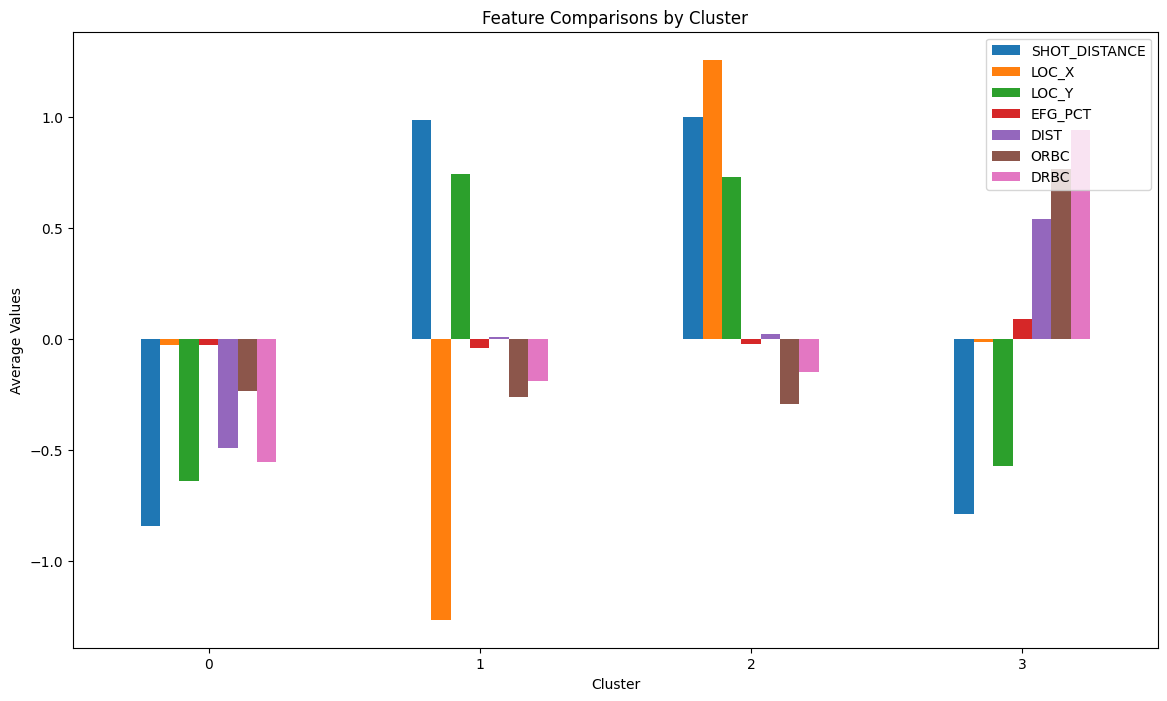

In [29]:
# Compare averages of key features by cluster
key_features = ['SHOT_DISTANCE', 'LOC_X', 'LOC_Y', 'EFG_PCT', 'DIST', 'ORBC', 'DRBC']
cluster_means = df.groupby('shot_cluster')[key_features].mean()
print("\nAverage Feature Values by Cluster:\n", cluster_means)

# Visualize average feature values
cluster_means.plot(kind='bar', figsize=(14, 8))
plt.title('Feature Comparisons by Cluster')
plt.ylabel('Average Values')
plt.xlabel('Cluster')
plt.legend(loc='upper right')
plt.xticks(rotation=0)
plt.show()


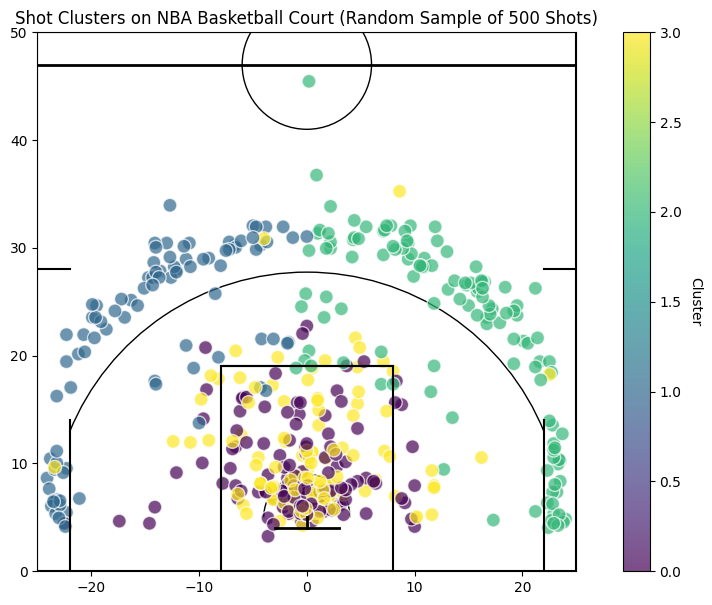

In [31]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

# Draw the basketball court
def draw_basketball_court(ax=None):
    if ax is None:
        ax = plt.gca()

    # Basketball court outline and features
    plt.plot([-25, 25, 25, -25, -25], [0, 0, 50, 50, 0], color='black')  # Court boundary
    center_circle = plt.Circle((0, 47), 6, color='black', fill=False)  # Center circle
    ax.add_artist(center_circle)
    plt.plot([-8, -8, 8, 8, -8], [0, 19, 19, 0, 0], color='black')  # Free throw lane
    plt.plot([-8, 8], [19, 19], color='black')  # Top of free throw lane
    restricted_area = Arc((0, 5), 8, 8, angle=0, theta1=0, theta2=180, color='black')
    ax.add_artist(restricted_area)  # Restricted area arc
    plt.plot([-3, 3], [4, 4], color='black', linewidth=2)  # Backboard
    plt.plot([0, 0], [4, 5], color='black', linewidth=2)  # Rim
    three_pt_arc = Arc((0, 4), 47.5, 47.5, angle=0, theta1=22, theta2=158, color='black')
    ax.add_artist(three_pt_arc)  # Three-point arc
    plt.plot([-22, -22], [0, 14], color='black')  # Left 3-point line
    plt.plot([22, 22], [0, 14], color='black')  # Right 3-point line
    plt.plot([-25, -22], [28, 28], color='black')  # Left side 3-point arc
    plt.plot([22, 25], [28, 28], color='black')  # Right side 3-point arc
    plt.plot([-25, 25], [47, 47], color='black', linewidth=2)  # Center court line

# Sample the dataset (using original coordinates)
df_sampled = df.sample(n=500, random_state=42)  # Adjust 'n' as needed

# Create the scatter plot using original coordinates
plt.figure(figsize=(12, 7))
ax = plt.gca()
draw_basketball_court(ax)

# Scatter plot colored by cluster assignments
scatter = plt.scatter(df_sampled['LOC_X_orig'], df_sampled['LOC_Y_orig'],
                      c=df_sampled['shot_cluster'], cmap='viridis', alpha=0.7, edgecolors='w', s=100)

# Add colorbar to indicate cluster numbers
colorbar = plt.colorbar(scatter, ax=ax)
colorbar.set_label('Cluster', rotation=270, labelpad=15)

# Set plot limits and title
plt.xlim(-25, 25)
plt.ylim(0, 50)
plt.title('Shot Clusters on NBA Basketball Court (Random Sample of 500 Shots)')
plt.grid(False)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()



Team-Level Shot Distribution by Cluster:
 shot_cluster                   0         1         2         3
TEAM_NAME                                                     
Atlanta Hawks           0.249206  0.206744  0.261630  0.282420
Boston Celtics          0.162671  0.256732  0.282631  0.297966
Brooklyn Nets           0.302299  0.221845  0.222872  0.252984
Charlotte Hornets       0.294293  0.241602  0.250933  0.213172
Chicago Bulls           0.290318  0.183965  0.218981  0.306736
Cleveland Cavaliers     0.286451  0.213867  0.257797  0.241886
Dallas Mavericks        0.223134  0.219559  0.245157  0.312150
Denver Nuggets          0.249710  0.177038  0.219979  0.353272
Detroit Pistons         0.369325  0.222458  0.223356  0.184861
Golden State Warriors   0.358113  0.246137  0.238611  0.157140
Houston Rockets         0.271450  0.270161  0.238518  0.219872
Indiana Pacers          0.421941  0.242185  0.164428  0.171445
LA Clippers             0.302893  0.237225  0.202427  0.257455
Los Angeles 

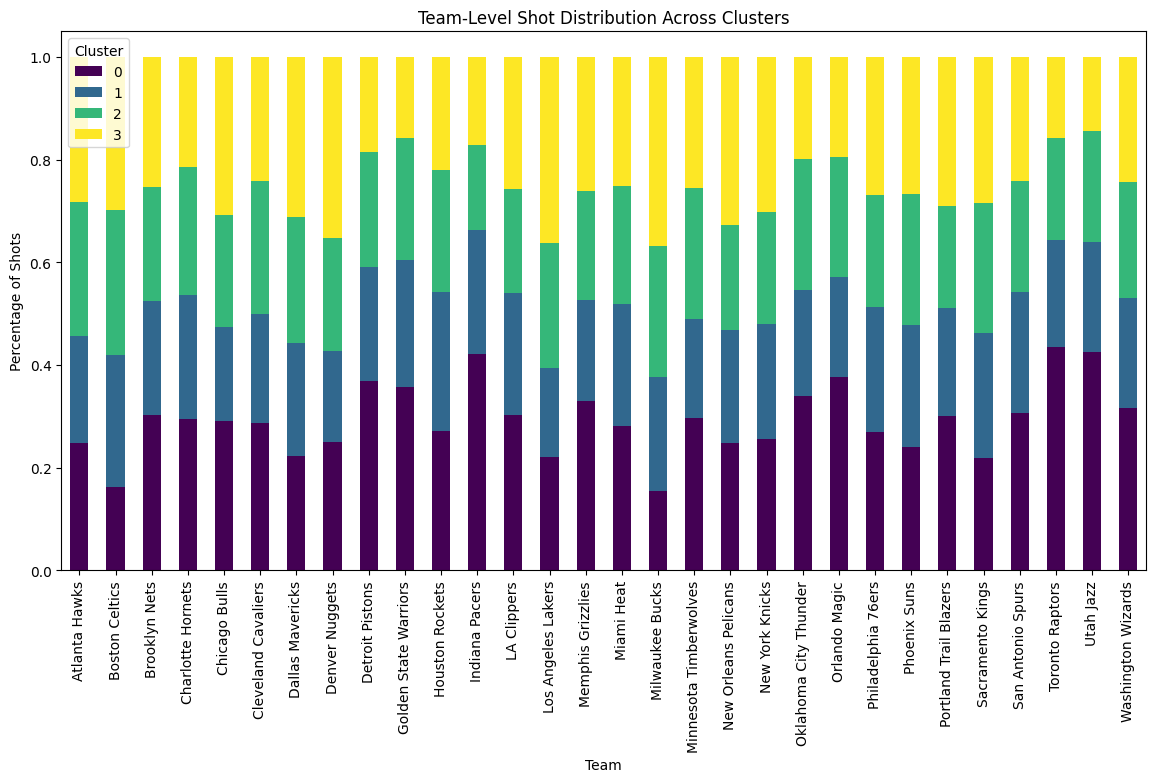

In [32]:
# Team-level distribution of shots across clusters
team_cluster_distribution = df.groupby(['TEAM_NAME', 'shot_cluster']).size().unstack(fill_value=0)

# Normalize to get percentages
team_cluster_distribution = team_cluster_distribution.div(team_cluster_distribution.sum(axis=1), axis=0)

print("\nTeam-Level Shot Distribution by Cluster:\n", team_cluster_distribution)

# Visualize the distribution
team_cluster_distribution.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Team-Level Shot Distribution Across Clusters')
plt.ylabel('Percentage of Shots')
plt.xlabel('Team')
plt.legend(title='Cluster')
plt.xticks(rotation=90)
plt.show()


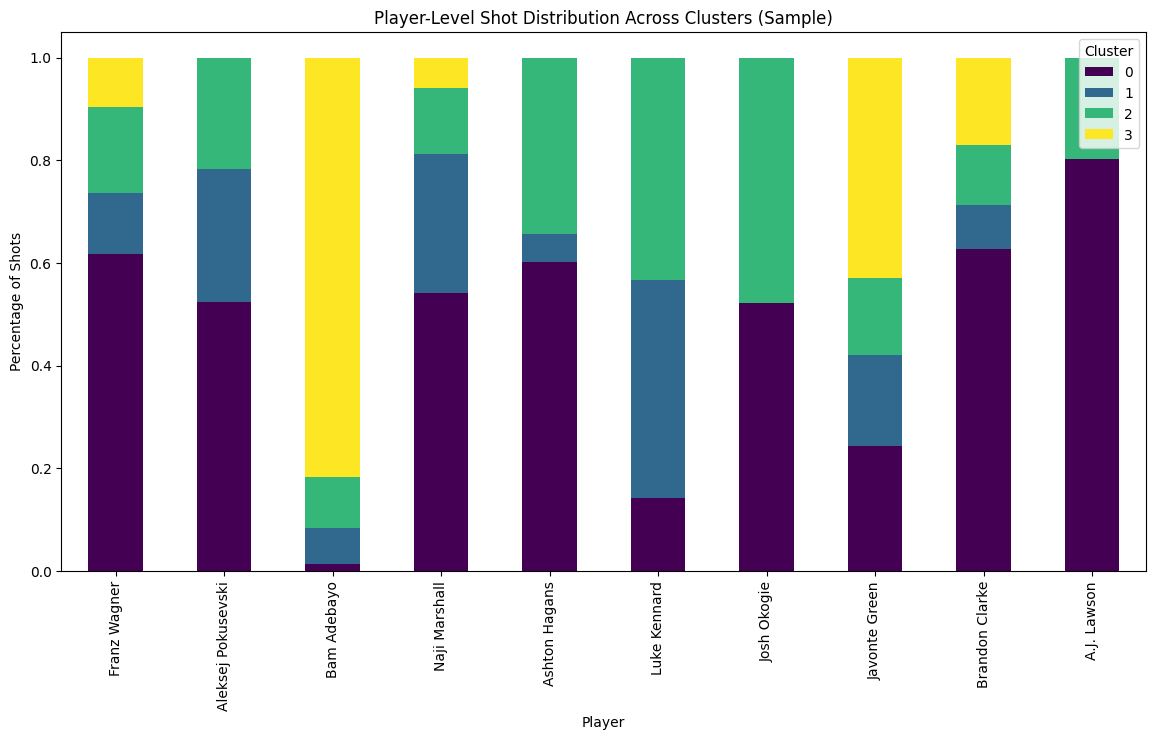

In [33]:
# Player-level distribution of shots across clusters
player_cluster_distribution = df.groupby(['PLAYER_NAME', 'shot_cluster']).size().unstack(fill_value=0)

# Normalize to get percentages
player_cluster_distribution = player_cluster_distribution.div(player_cluster_distribution.sum(axis=1), axis=0)

# Visualize a sample of players
player_cluster_distribution.sample(10).plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Player-Level Shot Distribution Across Clusters (Sample)')
plt.ylabel('Percentage of Shots')
plt.xlabel('Player')
plt.legend(title='Cluster')
plt.xticks(rotation=90)
plt.show()


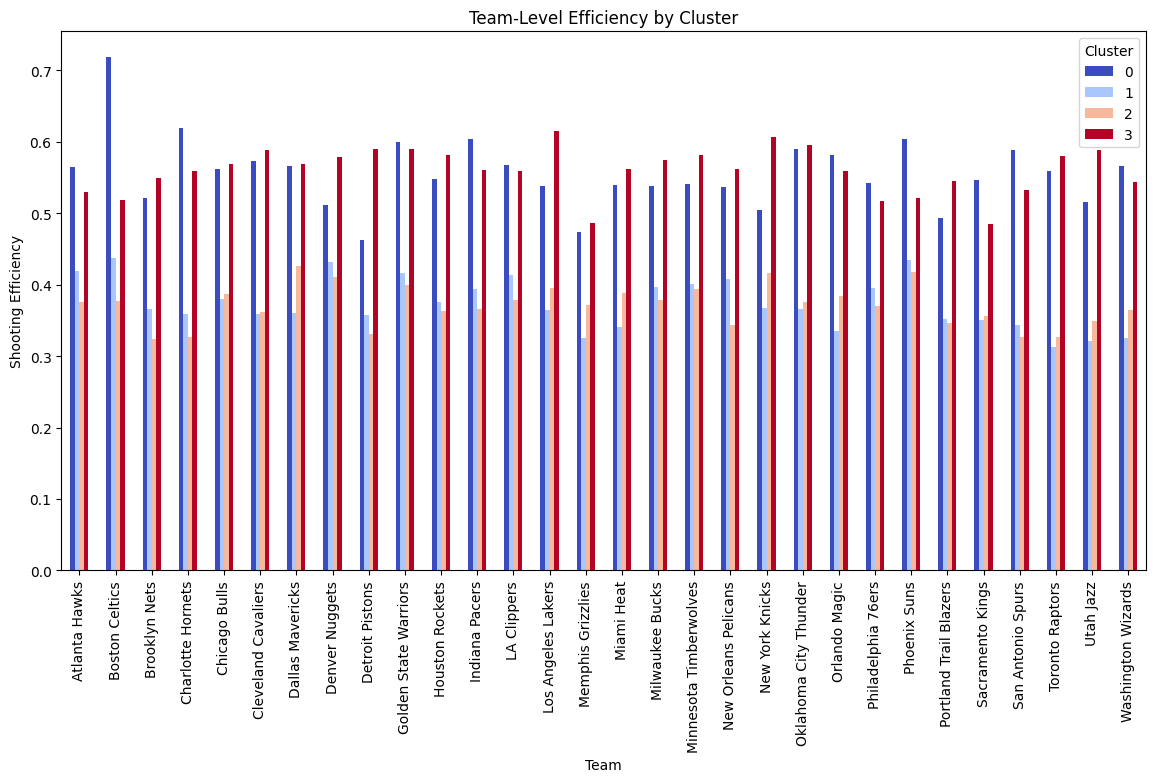

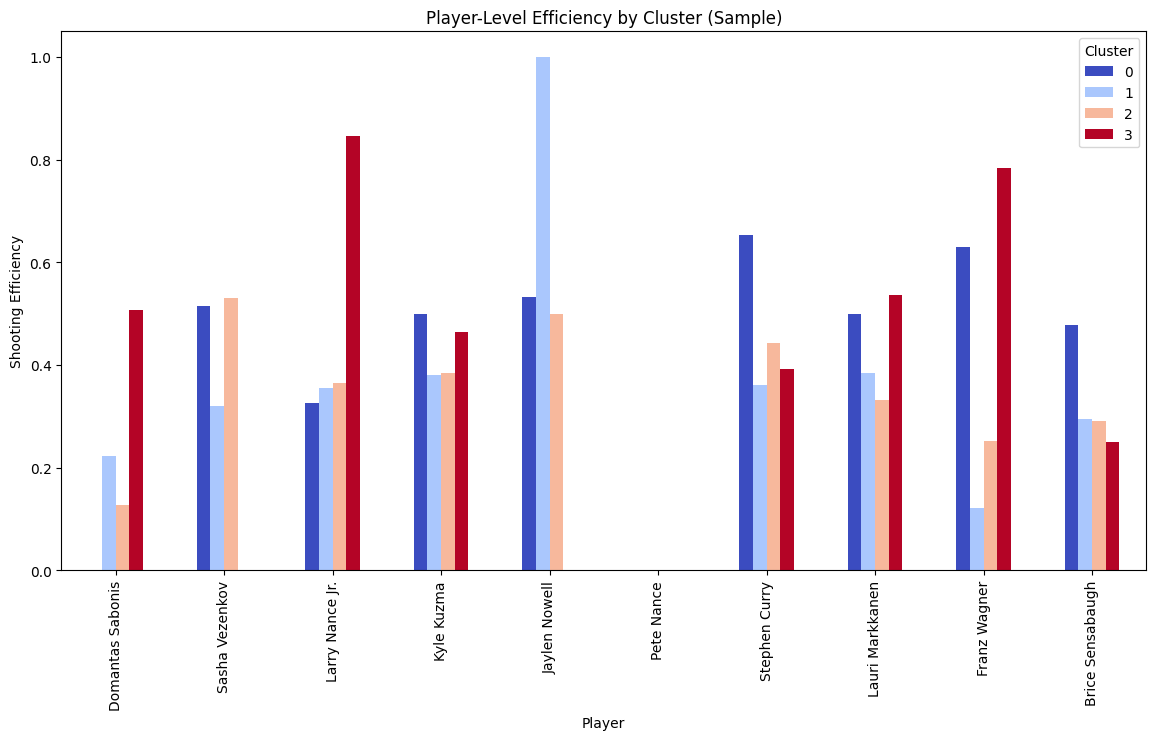

In [34]:
# Team-level efficiency by cluster
team_efficiency = df.groupby(['TEAM_NAME', 'shot_cluster'])['SHOT_MADE'].mean().unstack(fill_value=0)

# Visualize team efficiency
team_efficiency.plot(kind='bar', figsize=(14, 7), colormap='coolwarm')
plt.title('Team-Level Efficiency by Cluster')
plt.ylabel('Shooting Efficiency')
plt.xlabel('Team')
plt.legend(title='Cluster')
plt.xticks(rotation=90)
plt.show()

# Player-level efficiency by cluster
player_efficiency = df.groupby(['PLAYER_NAME', 'shot_cluster'])['SHOT_MADE'].mean().unstack(fill_value=0)

# Visualize a sample of players
player_efficiency.sample(10).plot(kind='bar', figsize=(14, 7), colormap='coolwarm')
plt.title('Player-Level Efficiency by Cluster (Sample)')
plt.ylabel('Shooting Efficiency')
plt.xlabel('Player')
plt.legend(title='Cluster')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Retain only six components for clustering
pca = PCA(n_components=6)
pca_components = pca.fit_transform(df[selected_features_final])


In [ ]:
import dask.array as da
from sklearn.metrics import silhouette_score
import numpy as np

# Convert PCA components to Dask array
pca_components_dask = da.from_array(pca_components, chunks=(10000, pca_components.shape[1]))

# Chunk-wise computation
def silhouette_chunk(data_chunk, labels_chunk):
    return silhouette_score(data_chunk, labels_chunk)

results = []
for i in range(pca_components_dask.numblocks[0]):  # Iterate over chunks
    chunk_data = pca_components_dask.blocks[i, :].compute()
    chunk_labels = cluster_labels[chunk_data.shape[0] * i:chunk_data.shape[0] * (i + 1)]
    results.append(silhouette_chunk(chunk_data, chunk_labels))

# Aggregate results
silhouette_avg = np.mean(results)
print("Silhouette Score (Chunked):", silhouette_avg)


NameError: name 'cluster_labels' is not defined

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization (First 2 Components)')
plt.show()


KeyboardInterrupt: 

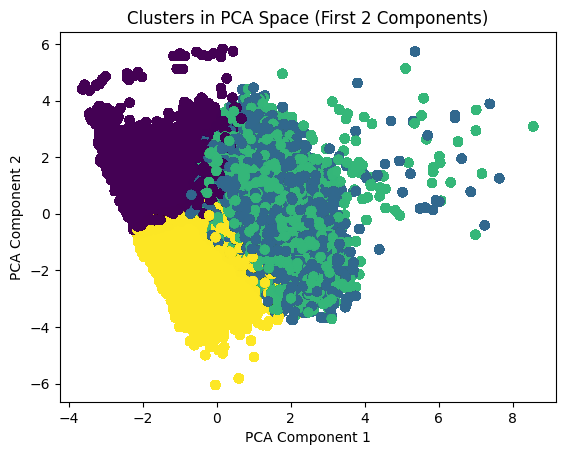

In [ ]:
# Clustering in 6-dimensional PCA space
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust number of clusters based on WCSS/silhouette
cluster_labels = kmeans.fit_predict(pca_components)

# Visualize clusters in the first 2 PCA dimensions
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters in PCA Space (First 2 Components)')
plt.show()


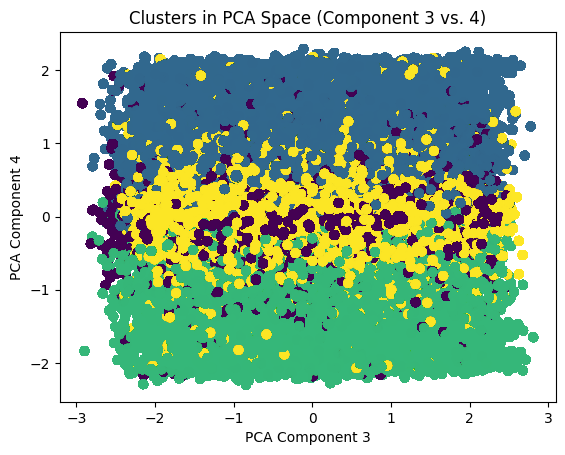

In [ ]:
# Plot PCA Component 3 vs. PCA Component 4
plt.scatter(pca_components[:, 2], pca_components[:, 3], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 3')
plt.ylabel('PCA Component 4')
plt.title('Clusters in PCA Space (Component 3 vs. 4)')
plt.show()


In [ ]:
import dask.array as da
from sklearn.metrics import silhouette_score
import numpy as np

# Convert PCA components to Dask array
pca_components_dask = da.from_array(pca_components, chunks=(10000, pca_components.shape[1]))

# Chunk-wise computation
def silhouette_chunk(data_chunk, labels_chunk):
    return silhouette_score(data_chunk, labels_chunk)

results = []
for i in range(pca_components_dask.numblocks[0]):  # Iterate over chunks
    chunk_data = pca_components_dask.blocks[i, :].compute()
    chunk_labels = cluster_labels[chunk_data.shape[0] * i:chunk_data.shape[0] * (i + 1)]
    results.append(silhouette_chunk(chunk_data, chunk_labels))

# Aggregate results
silhouette_avg = np.mean(results)
print("Silhouette Score (Chunked):", silhouette_avg)


In [ ]:
print("Cluster Centroids in PCA Space:", kmeans.cluster_centers_)


Cluster Centroids in PCA Space: [[-1.60606950e+00  8.72417924e-01 -2.43098837e-02 -3.31358544e-03
  -9.91346512e-02 -1.25579233e-01]
 [ 1.49431695e+00  3.15562505e-01  7.44243989e-03  1.26578030e+00
   1.72070282e-01 -6.01686490e-02]
 [ 1.47571555e+00  2.78530323e-01  5.03056091e-02 -1.26250883e+00
  -1.43629515e-03 -3.76728928e-02]
 [-8.60006712e-01 -1.21258704e+00 -2.29430423e-02  1.15195665e-02
  -4.26671381e-02  1.83849308e-01]]


In [ ]:
from sklearn.utils import resample
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Sample 10% of the data
pca_sample, cluster_labels_sample = resample(pca_components, cluster_labels, n_samples=int(len(pca_components) * 0.00225), random_state=42)

# Compute metrics on the sample
silhouette = silhouette_score(pca_sample, cluster_labels_sample, metric='euclidean', n_jobs=-1)


print("Silhouette Score (Sampled):", silhouette)



Silhouette Score (Sampled): 0.1812116455376595


In [ ]:
import dask.array as da
from dask_ml.metrics import silhouette_score as dask_silhouette_score

# Convert PCA components to Dask array
pca_components_dask = da.from_array(pca_components, chunks=(10000, pca_components.shape[1]))

# Compute Silhouette Score with Dask
silhouette = dask_silhouette_score(pca_components_dask, cluster_labels)
print("Silhouette Score (Dask):", silhouette)


ImportError: cannot import name 'silhouette_score' from 'dask_ml.metrics' (/usr/local/lib/python3.10/dist-packages/dask_ml/metrics/__init__.py)

In [ ]:
import dask.array as da
from sklearn.metrics import silhouette_score
import numpy as np

# Convert PCA components to Dask array
pca_components_dask = da.from_array(pca_components, chunks=(10000, pca_components.shape[1]))

# Chunk-wise computation
def silhouette_chunk(data_chunk, labels_chunk):
    return silhouette_score(data_chunk, labels_chunk)

results = []
for i in range(pca_components_dask.numblocks[0]):  # Iterate over chunks
    chunk_data = pca_components_dask.blocks[i, :].compute()
    chunk_labels = cluster_labels[chunk_data.shape[0] * i:chunk_data.shape[0] * (i + 1)]
    results.append(silhouette_chunk(chunk_data, chunk_labels))

# Aggregate results
silhouette_avg = np.mean(results)
print("Silhouette Score (Chunked):", silhouette_avg)


In [ ]:
from sklearn.metrics import silhouette_score
import dask.array as da

# Convert PCA components to Dask array
pca_components_dask = da.from_array(pca_components, chunks=(10000, pca_components.shape[1]))

# Convert Dask array back to NumPy array (if feasible)
pca_components_np = pca_components_dask.compute()
silhouette = silhouette_score(pca_components_np, cluster_labels)
print("Silhouette Score (Scikit-Learn with Dask):", silhouette)



Silhouette Score: 0.1563
Davies-Bouldin Index: 1.9603


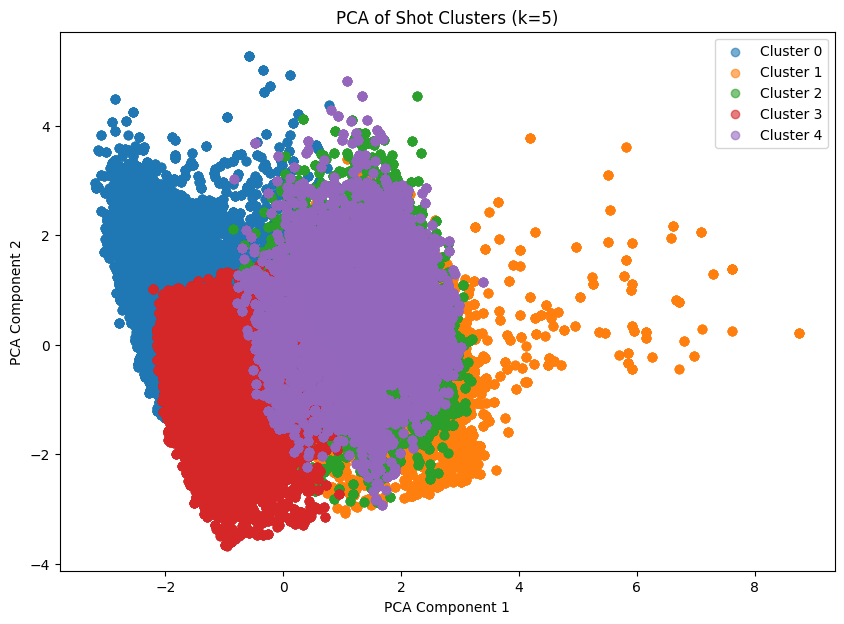

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Selected features for clustering
selected_features = ['LOC_Y', 'LOC_X', 'SHOT_DISTANCE', 'ACTION_TYPE_freq',
                     'time_left_in_game', 'time_left_in_quarter',
                     'BASIC_ZONE_In The Paint (Non-RA)', 'BASIC_ZONE_Restricted Area',
                     'ORBC', 'DRBC']

# Sample 200,000 rows from the dataset
sample_df = df.sample(n=400000, random_state=42)

# Initialize and fit MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=50000)
sample_df['shot_cluster'] = minibatch_kmeans.fit_predict(sample_df[selected_features])

# Initialize PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(sample_df[selected_features])

# Calculate validation metrics
silhouette_avg = silhouette_score(sample_df[selected_features], sample_df['shot_cluster'])
davies_bouldin_avg = davies_bouldin_score(sample_df[selected_features], sample_df['shot_cluster'])

print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.4f}")

# Create a scatter plot for the PCA-reduced components
plt.figure(figsize=(10, 7))
for cluster in range(5):
    cluster_points = pca_components[sample_df['shot_cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Shot Clusters (k=5)')
plt.legend()
plt.show()


In [ ]:
print(pca_components[:5])
print(pca_components.shape)


[[-1.2043199   0.93446339]
 [-1.2043199   0.93446339]
 [-1.2043199   0.93446339]
 [-1.2043199   0.93446339]
 [-1.2043199   0.93446339]]
(20134694, 2)


# Cluster Interpretation

In [ ]:

cluster_distribution = df['shot_cluster'].value_counts(normalize=True) * 100

# Convert to a DataFrame for easier interpretation
cluster_distribution_df = cluster_distribution.reset_index()
cluster_distribution_df.columns = ['Cluster', 'Percentage']

# Display the percentage distribution
print(cluster_distribution_df)


   Cluster  Percentage
0        4   31.082290
1        1   28.420198
2        0   19.605930
3        2   12.246518
4        3    8.645063


In [ ]:
# Group by 'shot_cluster' and 'ACTION_TYPE' to get the count of each type within each cluster
shot_type_distribution = df.groupby(['shot_cluster', 'ACTION_TYPE']).size().unstack(fill_value=0)

# Convert to percentage within each cluster
shot_type_distribution = shot_type_distribution.div(shot_type_distribution.sum(axis=1), axis=0) * 100

# Display the shot type distribution DataFrame as a percentage per cluster
print(shot_type_distribution)


<ipython-input-37-c49c993da6cb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shot_type_distribution = df.groupby(['shot_cluster', 'ACTION_TYPE']).size().unstack(fill_value=0)


ACTION_TYPE   Alley Oop Dunk Shot  Alley Oop Layup shot  Cutting Dunk Shot  \
shot_cluster                                                                 
0                        0.000000              0.000000           0.000000   
1                        0.000000              0.000000           0.000000   
2                        0.000000              0.000000           0.000000   
3                        0.000000              0.000000           0.000000   
4                        2.589032              1.083821           4.143601   

ACTION_TYPE   Cutting Finger Roll Layup Shot  Cutting Layup Shot  \
shot_cluster                                                       
0                                   0.000000            0.000000   
1                                   0.000000            0.000000   
2                                   0.000000            0.000000   
3                                   0.000000            0.000000   
4                                   1.163474 

In [ ]:

# Create a helper column to identify made shots and three-point shots
df['is_made'] = df['SHOT_MADE'] == 1
df['is_three'] = df['SHOT_TYPE'] == '3PT Field Goal'

# Group by cluster to calculate shooting percentage and eFG%
cluster_efficiency = df.groupby('shot_cluster').apply(lambda x: pd.Series({
    'Shooting Percentage': x['is_made'].mean() * 100,  # Shooting Percentage as a percentage
    'eFG%': (x['is_made'].sum() + 0.5 * x['is_three'].sum()) / len(x) * 100  # eFG% as a percentage
})).reset_index()

# Print the result
print(cluster_efficiency)


   shot_cluster  Shooting Percentage       eFG%
0             0            46.776974  62.694264
1             1            37.838167  84.455649
2             2            39.073704  62.671917
3             3            49.059809  49.059809
4             4            59.376664  61.862337


<ipython-input-38-975d29efbf43>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_efficiency = df.groupby('shot_cluster').apply(lambda x: pd.Series({
